# TEXT CLASSIFICATION

In [1]:
import re
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
#git hub https://github.com/Stass88/lattelecom
df_train = pd.read_csv('train.tsv', sep='\t')
df_test = pd.read_csv('test.tsv', sep='\t')


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IldingoLeads\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
##Descriptive analyse

stop_word = set(stopwords.words('english')) 
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', min_df=0.001)
sparse_matrix = word_vectorizer.fit_transform(df_test['Phrase'])
frequencies = sum(sparse_matrix).toarray()[0]
freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
#freq.sort_values('frequency', ascending=False)

<AxesSubplot:xlabel='Rating', ylabel='Sentiment'>

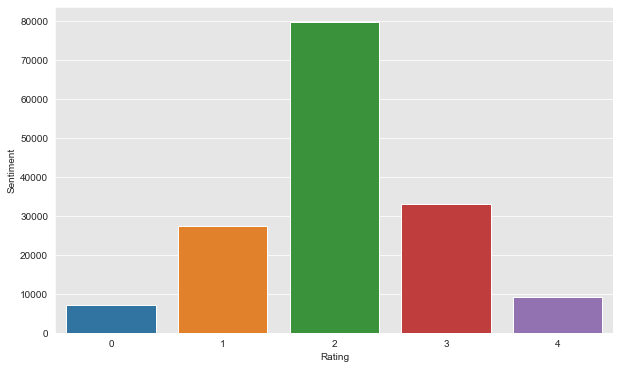

In [5]:
#Visualization of data set
a = df_train.Sentiment.value_counts()
a = pd.DataFrame(a)
a['Rating'] = a.index
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='Sentiment', x='Rating', data=a)

In [6]:
df_train['Phrase'] = df_train['Phrase'].str.lower()
df_train['Phrase'] = df_train['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_test['Phrase'] = df_test['Phrase'].str.lower()
df_test['Phrase'] = df_test['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))



In [7]:
X_train = df_train.Phrase
y_train = df_train.Sentiment
tokenize = Tokenizer()
tokenize.fit_on_texts(X_train.values)
X_test = df_test.Phrase

In [8]:
X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)
max_lenght = max([len(s.split()) for s in df_train['Phrase']])
X_train = pad_sequences(X_train, max_lenght)
X_test = pad_sequences(X_test, max_lenght)
print(X_train.shape)
print(X_test.shape)

(156060, 48)
(66292, 48)


In [11]:
#I choose to build 3 hidden layers
EMBEDDING_DIM = 100
unknown = len(tokenize.word_index)+1
model = Sequential()
model.add(Embedding(unknown, EMBEDDING_DIM, input_length=max_lenght))
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2 ))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 48, 100)           1637800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,654,989
Trainable params: 1,654,989
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1)

1220/1220 [==============================] - 402s 330ms/step - loss: 0.9733 - accuracy: 0.6104


In [14]:
final_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
df_train = pd.read_csv('train.tsv', sep='\t')
df_train['Phrase'] = df_train['Phrase'].str.lower()
stop_word = set(stopwords.words('english')) 


df_train['tokezines_sents'] = df_train.apply(lambda x: nltk.word_tokenize(x['Phrase']),axis=1)
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
df_train['tokezines_sents'] = df_train['tokezines_sents'].apply(lambda x: [stemmer.stem(y) for y in x])
df_train['tokezines_sents'] = df_train['tokezines_sents'].apply(lambda x: ' '.join(x))

from sklearn.model_selection import train_test_split
x=df_train.tokezines_sents
y=df_train.Sentiment
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=1)
x_train_df = vect.fit_transform(X_train)
x_test_df = vect.transform(X_test)
print('Number of features:', len(vect.get_feature_names()))

Number of features: 10730


In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_df, y_train)
y_pred_class = nb.predict(x_test_df)
print('NB:', metrics.accuracy_score(y_test, y_pred_class))

NB: 0.612392669486095


In [19]:
from sklearn.linear_model import SGDClassifier
SVM = SGDClassifier()
SVM.fit(x_train_df, y_train)
y_pred_class = SVM.predict(x_test_df)
print('SVM:', metrics.accuracy_score(y_test, y_pred_class))

SVM: 0.605760604895553
